In [2]:
from dataloader import h5pyDataset, h5pyBatchGenerator, get_dataloader
import os
import re

In [41]:
log_path = 'model_checkpoint/HanBart_202110220849/info/'
log_files = os.listdir(log_path)


In [42]:
log_file_name = ['train_instance_'+str(i)+'_info.log'  for i in sorted([int(log.split('_')[2]) for log in log_files]) ]

In [63]:
train_loss = []
for log_file in log_file_name:
    with open(log_path+log_file, 'r') as f:
        log_data = f.readlines()
    
    for log in log_data:
        if log.split('|')[-1].startswith(' Loss'):
            train_loss.append(float(log.split('|')[-1].split(' ')[2]))

In [67]:
title = log_path.split('/')[1]

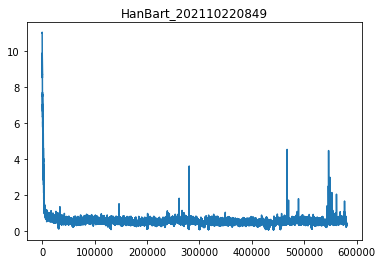

In [69]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title(title)

plt.savefig('./loss_graph.png')


# model_checkpoint

In [14]:
from transformers import BartConfig, BartForConditionalGeneration, Adafactor

In [77]:
aa={'a':0}

In [80]:
def aaa(aa):
    aa['a']=1

In [81]:
aaa(aa)

In [82]:
aa

{'a': 1}

In [15]:
Adafactor

transformers.optimization.Adafactor

In [8]:
checkpoint = './model_checkpoint/HanBart_202110220849'

In [9]:
config = BartConfig.from_json_file("HanBart-54kN/config.json")
model = BartForConditionalGeneration(config)

In [10]:
checkpoint = 'model_checkpoint/HanBart_202110220849/saved_checkpoint_235.ckpt'

In [11]:
ckpt = torch.load(checkpoint)

In [16]:
ckpt.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'trained_data_list'])

In [17]:
ckpt['epoch']

0

In [19]:
ckpt['trained_data_list']

['h5py_data_108.h5py',
 'h5py_data_001.h5py',
 'h5py_data_133.h5py',
 'h5py_data_204.h5py',
 'h5py_data_063.h5py',
 'h5py_data_202.h5py',
 'h5py_data_085.h5py',
 'h5py_data_072.h5py',
 'h5py_data_006.h5py',
 'h5py_data_091.h5py',
 'h5py_data_005.h5py',
 'h5py_data_047.h5py',
 'h5py_data_020.h5py',
 'h5py_data_103.h5py',
 'h5py_data_254.h5py',
 'h5py_data_058.h5py',
 'h5py_data_140.h5py',
 'h5py_data_009.h5py',
 'h5py_data_175.h5py',
 'h5py_data_167.h5py',
 'h5py_data_071.h5py',
 'h5py_data_208.h5py',
 'h5py_data_087.h5py',
 'h5py_data_214.h5py',
 'h5py_data_080.h5py',
 'h5py_data_043.h5py',
 'h5py_data_225.h5py',
 'h5py_data_102.h5py',
 'h5py_data_240.h5py',
 'h5py_data_192.h5py',
 'h5py_data_158.h5py',
 'h5py_data_155.h5py',
 'h5py_data_188.h5py',
 'h5py_data_138.h5py',
 'h5py_data_222.h5py',
 'h5py_data_060.h5py',
 'h5py_data_088.h5py',
 'h5py_data_048.h5py',
 'h5py_data_216.h5py',
 'h5py_data_041.h5py',
 'h5py_data_013.h5py',
 'h5py_data_203.h5py',
 'h5py_data_036.h5py',
 'h5py_data

In [20]:
model.load_state_dict(ckpt['model_state_dict'])

<All keys matched successfully>

In [64]:
optimizer = Adafactor(model.parameters(), warmup_init=True)


In [67]:
optimizer.load_state_dict(ckpt['optimizer_state_dict'])


ValueError: loaded state dict contains a parameter group that doesn't match the size of optimizer's group

In [65]:
len(list(model.parameters()))

259

In [28]:
for i in model.named_parameters():
    print(i)

('model.shared.weight', Parameter containing:
tensor([[ 2.3850, -0.4732,  1.7342,  ..., -0.9838, -2.2434,  2.5805],
        [ 1.5845, -0.7695, -1.2818,  ...,  0.2067, -0.0161,  0.7921],
        [-1.6284,  0.6408, -1.7677,  ..., -0.6871,  1.9715, -3.0442],
        ...,
        [ 2.3840, -0.4751,  1.7349,  ..., -0.9821, -2.2432,  2.5798],
        [ 2.3845, -0.4747,  1.7357,  ..., -0.9833, -2.2430,  2.5810],
        [ 2.3851, -0.4742,  1.7355,  ..., -0.9833, -2.2433,  2.5808]],
       requires_grad=True))
('model.encoder.embed_positions.weight', Parameter containing:
tensor([[-0.0038, -0.0140,  0.0037,  ..., -0.0066,  0.0113, -0.0300],
        [ 0.0058,  0.0098,  0.0216,  ...,  0.0003, -0.0443,  0.0367],
        [-0.1476,  0.0480, -0.1833,  ...,  0.2040,  0.0291, -0.0102],
        ...,
        [ 0.0111,  0.0410, -0.0148,  ...,  0.0069, -0.0005,  0.0020],
        [-0.0043,  0.0136, -0.0115,  ..., -0.0077,  0.0178, -0.0372],
        [-0.0114, -0.0051,  0.0041,  ..., -0.0110, -0.0095, -0.014

In [41]:
type(ckpt['optimizer_state_dict']['state'])

dict

In [ ]:
 b['optimizer_state_dict']['state'].keys()


In [33]:
#len([print(p.size()) for p in model.parameters()])
len(list(model.parameters()))


259

In [40]:
optimizer.state=

defaultdict(dict, {})

In [47]:
from copy import deepcopy

state_dict = deepcopy(ckpt['optimizer_state_dict'])
# Validate the state_dict


In [45]:
groups = list(model.parameters())


In [43]:
groups

[Parameter containing:
 tensor([[ 2.3850, -0.4732,  1.7342,  ..., -0.9838, -2.2434,  2.5805],
         [ 1.5845, -0.7695, -1.2818,  ...,  0.2067, -0.0161,  0.7921],
         [-1.6284,  0.6408, -1.7677,  ..., -0.6871,  1.9715, -3.0442],
         ...,
         [ 2.3840, -0.4751,  1.7349,  ..., -0.9821, -2.2432,  2.5798],
         [ 2.3845, -0.4747,  1.7357,  ..., -0.9833, -2.2430,  2.5810],
         [ 2.3851, -0.4742,  1.7355,  ..., -0.9833, -2.2433,  2.5808]],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0038, -0.0140,  0.0037,  ..., -0.0066,  0.0113, -0.0300],
         [ 0.0058,  0.0098,  0.0216,  ...,  0.0003, -0.0443,  0.0367],
         [-0.1476,  0.0480, -0.1833,  ...,  0.2040,  0.0291, -0.0102],
         ...,
         [ 0.0111,  0.0410, -0.0148,  ...,  0.0069, -0.0005,  0.0020],
         [-0.0043,  0.0136, -0.0115,  ..., -0.0077,  0.0178, -0.0372],
         [-0.0114, -0.0051,  0.0041,  ..., -0.0110, -0.0095, -0.0147]],
        requires_grad=True),
 Parameter con

In [48]:
state_dict['param_groups']

[{'lr': None,
  'eps': [1e-30, 0.001],
  'clip_threshold': 1.0,
  'decay_rate': -0.8,
  'beta1': None,
  'weight_decay': 0.0,
  'scale_parameter': True,
  'relative_step': True,
  'warmup_init': True,
  'params': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   

In [51]:
saved_groups = state_dict['param_groups']


In [52]:
len(saved_groups[0]['params'])


260

In [58]:
#groups[1]

In [54]:
if len(groups) != len(saved_groups):
    raise ValueError("loaded state dict has a different number of "
                     "parameter groups")

ValueError: loaded state dict has a different number of parameter groups

In [ ]:

param_lens = (len(g['params']) for g in groups)
saved_lens = (len(g['params']) for g in saved_groups)
if any(p_len != s_len for p_len, s_len in zip(param_lens, saved_lens)):

In [44]:
model.eval()

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(54000, 768, padding_idx=0)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(54000, 768, padding_idx=0)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0): BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        

In [115]:
keys = list(ckpt['optimizer_state_dict']['state'].keys())


In [19]:
import numpy as np
array = np.array

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [16]:
a =[array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1])]

In [21]:
b = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [171]:
import torch_xla.utils.serialization as xser


In [173]:
state_dict = xser.load('model_checkpoint/HanBart_202110220221/model_0_h5py_data_26.ckpt')

# test_data

In [4]:
from dataloader import h5pyDataset, h5pyBatchGenerator, get_dataloader
from tokenization_hanbert import HanBertTokenizer


In [5]:
tokenizer = HanBertTokenizer.from_pretrained("HanBart-54kN")


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'HanBertTokenizer'.


In [7]:
dataset = h5pyDataset(data_path="../h5py_dataset/h5py_data_108.h5py")

batchgenerator = h5pyBatchGenerator(tokenizer, make_noise=True)
train_loader = get_dataloader(dataset, batchgenerator, batch_size=16)

In [9]:
batch = next(iter(train_loader))

In [13]:
tokenizer.batch_decode(batch['input_ids'])

["[CLS] 그러나 이러한 인도 [MASK] 학문을 중심으로 [MASK] [MASK] [MASK] 정책은 기독교 선교사들과 개화주의자들 [MASK] [MASK]에 부딪혀 서구 교육 중심으로 바뀌었다. 영국인들이 도입한 근대 교육은 인도인들을 위한 기초 교육이 아닌 중간 엘리트 [MASK] [MASK] 위한 소수의 [MASK] [MASK] 특히 대학교육을 중심으로 이루어졌다. 근대 교육이 확산되면서 1857년에는 캘커타 [MASK] [MASK] 마드라스에 대학이 설립되었다. 근대 교육이 이처럼 영국의 제품을 구매할 수 [MASK] [MASK] 계층이 많이 증가하였다. 이 [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] 피부에 영국인의 기호와 사고, 도덕 등을 가진 계급의 육성'이 [MASK] [MASK] [MASK] [MASK] 뜻한 것이다. [EOS] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 